# Fit REDOX Models
Fit models using the FCHL representation that predict the REDOX energy of molecules. 

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error
from ase.units import Hartree, eV
from time import perf_counter
from tqdm import tqdm
import pickle as pkl
import pandas as pd
import numpy as np
import gzip
import json
import pandas as pd
import numpy as np
import os
import scipy as sp
import sklearn.metrics as metrics

## Load in the Training Data for B3LYP
Load the training data, complete with the representations

In [2]:
train_data = pd.read_pickle('train_data_deltaIP_g4mp2a_b3lyp.pkl.gz')

In [3]:
test_data = pd.read_pickle('test_data_deltaIP_g4mp2a_b3lyp.pkl.gz')

## Load in the Model
Use the model from the previous calculation

In [4]:
with gzip.open('model_deltaIP_g4mp2a_b3lyp.pkl.gz', 'rb') as fp:
    model = pkl.load(fp)

## Train a Model on cations atomization
Train only using the WB97XD results

In [5]:
results = []
for train_size in tqdm([100, 500, 1000, 1500, 2000, 3000 ]):
    # Get some training data
    train_subset = train_data.sample(train_size)
    
    # Train the model
    train_time = perf_counter()
    model.fit(train_subset['rep'].tolist(), train_subset['deltaIP_g4mp2a_b3lyp'])
    train_time = perf_counter() - train_time

    # Predict the u0 for the test set
    test_time = perf_counter()
    pred_b = model.predict(test_data['rep'].tolist())
    test_time = perf_counter() - test_time
    
    results.append({
        'train_size': train_size,
        'mae': mean_absolute_error(pred_b, test_data['deltaIP_g4mp2a_b3lyp']), 
        'train_time': train_time, 
        'test_time': test_time,
    })

100%|██████████| 6/6 [13:23<00:00, 133.94s/it]


In [6]:
results = pd.DataFrame(results)
results

,mae,test_time,train_size,train_time
0,0.130773,3.377243,100,0.554983
1,0.092084,12.926402,500,9.022671
2,0.074808,25.309257,1000,34.920594
3,0.063161,37.271871,1500,77.507873
4,0.061586,55.666843,2000,157.274483
5,0.058040,74.296838,3000,315.457945


In [7]:
with open('deltaIP_g4mp2a_b3lyp.json', 'w') as fp:
    json.dump({
        'name': 'FCHL',
        'description': 'Model built using the FCHL representation, as implemented in QML, and KRR',
        'rdox_benchmark': results.to_dict('records')
    }, fp, indent=2)

In [8]:
with gzip.open('deltaIP_g4mp2a_b3lyp.pkl.gz', 'wb') as fp:
    pkl.dump(model, fp)

In [9]:
data=pd.DataFrame(data={'filename': test_data['filename'], 
                        'n_heavy_atoms': test_data['n_heavy_atoms'], 
                        'xyz': test_data['xyz'], 
                        'xyz_oxidized': test_data['xyz_oxidized'],
                        'deltaIP_g4mp2a_b3lyp': test_data['deltaIP_g4mp2a_b3lyp'], 
                        'pred_deltaIP_g4mp2a_b3lyp' : pred_b})


In [10]:
data.to_csv('deltaIP_g4mp2a_b3lyp_fchl_predictions.csv', index=False)

In [11]:
data = pd.read_csv('deltaIP_g4mp2a_b3lyp_fchl_predictions.csv')

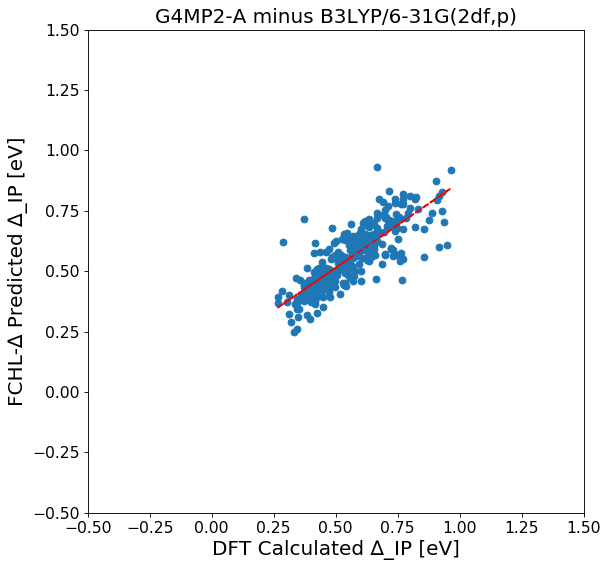

In [12]:
#fig, ax = plt.subplots()

w = 8
h = 8
d = 80
plt.figure(figsize=(w, h), dpi=d)

data = pd.read_csv('deltaIP_g4mp2a_b3lyp_fchl_predictions.csv')
#figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')

x = data['deltaIP_g4mp2a_b3lyp']
y = data['pred_deltaIP_g4mp2a_b3lyp']
z = np.polyfit(x, y, 1)
plt.scatter(x, y)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('G4MP2-A minus B3LYP/6-31G(2df,p)', fontsize=18)
plt.xlabel('DFT Calculated ∆_IP [eV]', fontsize=18)
plt.ylabel('FCHL-∆ Predicted ∆_IP [eV]', fontsize=18)
#plt.plot(data["G4MP2_IP"], data["pred_y_300-g4mp2"], "o")
plt.savefig("deltaIP_g4mp2a_b3lyp.png")
plt.show()


In [13]:
data = pd.read_csv('deltaIP_g4mp2a_b3lyp_fchl_predictions.csv')

y = data['deltaIP_g4mp2a_b3lyp']
yhat = data['pred_deltaIP_g4mp2a_b3lyp']

mae = metrics.mean_absolute_error(y, yhat)
mse = metrics.mean_squared_error(y, yhat)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y,yhat)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)


Results of sklearn.metrics:
MAE: 0.05803961192230455
MSE: 0.006805282132839929
RMSE: 0.08249413392987363
R-Squared: 0.668800397737339


## Load in the Training Data for B3LYP-A
Load the training data, complete with the representations

In [14]:
train_data = pd.read_pickle('train_data_deltaIP_g4mp2a_b3lypa.pkl.gz')

In [15]:
test_data = pd.read_pickle('test_data_deltaIP_g4mp2a_b3lypa.pkl.gz')

## Load in the Model
Use the model from the previous calculation

In [16]:
with gzip.open('model_deltaIP_g4mp2a_b3lypa.pkl.gz', 'rb') as fp:
    model = pkl.load(fp)

## Train a Model on cations atomization
Train only using the WB97XD results

In [17]:
results = []
for train_size in tqdm([100, 500, 1000, 1500, 2000, 3000 ]):
    # Get some training data
    train_subset = train_data.sample(train_size)
    
    # Train the model
    train_time = perf_counter()
    model.fit(train_subset['rep'].tolist(), train_subset['deltaIP_g4mp2a_b3lypa'])
    train_time = perf_counter() - train_time

    # Predict the u0 for the test set
    test_time = perf_counter()
    pred_ba = model.predict(test_data['rep'].tolist())
    test_time = perf_counter() - test_time
    
    results.append({
        'train_size': train_size,
        'mae': mean_absolute_error(pred_ba, test_data['deltaIP_g4mp2a_b3lypa']), 
        'train_time': train_time, 
        'test_time': test_time,
    })

  0%|          | 0/6 [00:00<?, ?it/s]/home/ndandu/.conda/envs/jcesr_ml/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.87251e-18): result may not be accurate.
  overwrite_a=True).T
100%|██████████| 6/6 [13:20<00:00, 133.45s/it]


In [18]:
results = pd.DataFrame(results)
results

,mae,test_time,train_size,train_time
0,0.116709,3.483021,100,0.530714
1,0.085424,12.912441,500,8.879245
2,0.073988,24.598636,1000,33.427802
3,0.066215,37.169316,1500,75.746865
4,0.064325,56.183827,2000,157.554055
5,0.059015,74.875581,3000,315.302030


In [19]:
with open('deltaIP_g4mp2a_b3lypa.json', 'w') as fp:
    json.dump({
        'name': 'FCHL',
        'description': 'Model built using the FCHL representation, as implemented in QML, and KRR',
        'rdox_benchmark': results.to_dict('records')
    }, fp, indent=2)

In [20]:
with gzip.open('deltaIP_g4mp2a_b3lypa.pkl.gz', 'wb') as fp:
    pkl.dump(model, fp)

In [21]:
data=pd.DataFrame(data={'filename': test_data['filename'], 
                        'n_heavy_atoms': test_data['n_heavy_atoms'], 
                        'xyz': test_data['xyz'], 
                        'xyz_oxidized': test_data['xyz_oxidized'],
                        'deltaIP_g4mp2a_b3lypa': test_data['deltaIP_g4mp2a_b3lypa'], 
                        'pred_deltaIP_g4mp2a_b3lypa' : pred_ba})


In [22]:
data.to_csv('deltaIP_g4mp2a_b3lypa_fchl_predictions.csv', index=False)

In [23]:
data = pd.read_csv('deltaIP_g4mp2a_b3lypa_fchl_predictions.csv')

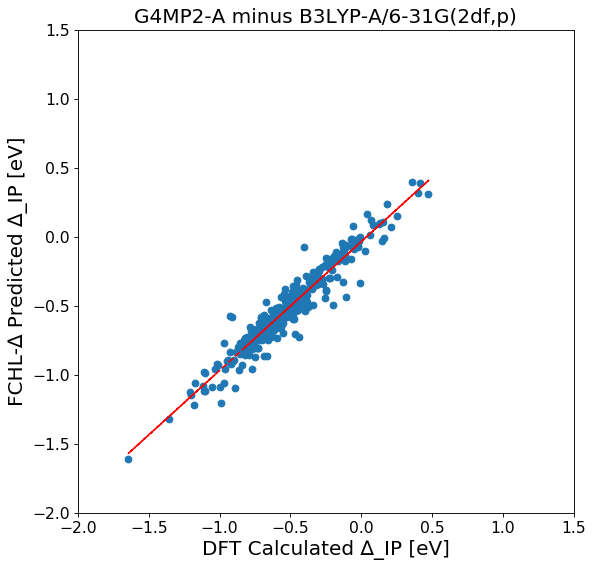

In [24]:
#fig, ax = plt.subplots()

w = 8
h = 8
d = 80
plt.figure(figsize=(w, h), dpi=d)

data = pd.read_csv('deltaIP_g4mp2a_b3lypa_fchl_predictions.csv')
#figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')

x = data['deltaIP_g4mp2a_b3lypa']
y = data['pred_deltaIP_g4mp2a_b3lypa']
z = np.polyfit(x, y, 1)
plt.scatter(x, y)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.xlim(-2.0, 1.5)
plt.ylim(-2.0, 1.5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('G4MP2-A minus B3LYP-A/6-31G(2df,p)', fontsize=18)
plt.xlabel('DFT Calculated ∆_IP [eV]', fontsize=18)
plt.ylabel('FCHL-∆ Predicted ∆_IP [eV]', fontsize=18)
#plt.plot(data["G4MP2_IP"], data["pred_y_300-g4mp2"], "o")
plt.savefig("deltaIP_g4mp2a_b3lypa.png")
plt.show()


In [25]:
data = pd.read_csv('deltaIP_g4mp2a_b3lypa_fchl_predictions.csv')

y = data['deltaIP_g4mp2a_b3lypa']
yhat = data['pred_deltaIP_g4mp2a_b3lypa']

mae = metrics.mean_absolute_error(y, yhat)
mse = metrics.mean_squared_error(y, yhat)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y,yhat)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)


Results of sklearn.metrics:
MAE: 0.05901515281417332
MSE: 0.007030174420939982
RMSE: 0.0838461353965702
R-Squared: 0.9256971096969048


## Load in the Training Data for B3LYP_L
Load the training data, complete with the representations

In [26]:
train_data = pd.read_pickle('train_data_deltaIP_g4mp2a_b3lypL.pkl.gz')

In [27]:
test_data = pd.read_pickle('test_data_deltaIP_g4mp2a_b3lypL.pkl.gz')

## Load in the Model
Use the model from the previous calculation

In [28]:
with gzip.open('model_deltaIP_g4mp2a_b3lypL.pkl.gz', 'rb') as fp:
    model = pkl.load(fp)

## Train a Model on cations atomization
Train only using the WB97XD results

In [29]:
results = []
for train_size in tqdm([100, 500, 1000, 1500, 2000, 3000 ]):
    # Get some training data
    train_subset = train_data.sample(train_size)
    
    # Train the model
    train_time = perf_counter()
    model.fit(train_subset['rep'].tolist(), train_subset['deltaIP_g4mp2a_b3lypL'])
    train_time = perf_counter() - train_time

    # Predict the u0 for the test set
    test_time = perf_counter()
    pred_bL = model.predict(test_data['rep'].tolist())
    test_time = perf_counter() - test_time
    
    results.append({
        'train_size': train_size,
        'mae': mean_absolute_error(pred_bL, test_data['deltaIP_g4mp2a_b3lypL']), 
        'train_time': train_time, 
        'test_time': test_time,
    })

  0%|          | 0/6 [00:00<?, ?it/s]/home/ndandu/.conda/envs/jcesr_ml/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=3.2325e-18): result may not be accurate.
  overwrite_a=True).T
100%|██████████| 6/6 [13:24<00:00, 134.04s/it]


In [30]:
results = pd.DataFrame(results)
results

,mae,test_time,train_size,train_time
0,0.167831,3.438118,100,0.508664
1,0.088887,12.867525,500,8.727046
2,0.073034,25.131585,1000,34.732709
3,0.071901,38.159237,1500,79.369376
4,0.064622,55.713093,2000,155.612369
5,0.059555,74.797710,3000,315.136393


In [31]:
with open('deltaIP_g4mp2a_b3lypL.json', 'w') as fp:
    json.dump({
        'name': 'FCHL',
        'description': 'Model built using the FCHL representation, as implemented in QML, and KRR',
        'rdox_benchmark': results.to_dict('records')
    }, fp, indent=2)

In [32]:
with gzip.open('deltaIP_g4mp2a_b3lypL.pkl.gz', 'wb') as fp:
    pkl.dump(model, fp)

In [33]:
data=pd.DataFrame(data={'filename': test_data['filename'], 
                        'n_heavy_atoms': test_data['n_heavy_atoms'], 
                        'xyz': test_data['xyz'], 
                        'xyz_oxidized': test_data['xyz_oxidized'],
                        'deltaIP_g4mp2a_b3lypL': test_data['deltaIP_g4mp2a_b3lypL'], 
                        'pred_deltaIP_g4mp2a_b3lypL' : pred_bL})


In [34]:
data.to_csv('deltaIP_g4mp2a_b3lypL_fchl_predictions.csv', index=False)

In [35]:
data = pd.read_csv('deltaIP_g4mp2a_b3lypL_fchl_predictions.csv')

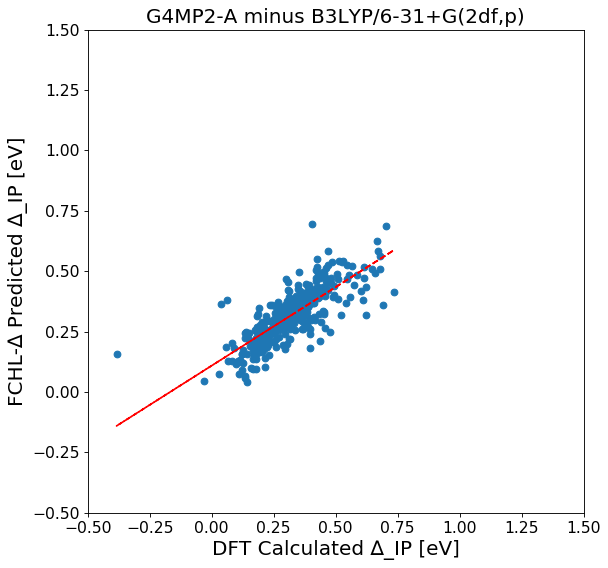

In [36]:
#fig, ax = plt.subplots()

w = 8
h = 8
d = 80
plt.figure(figsize=(w, h), dpi=d)

data = pd.read_csv('deltaIP_g4mp2a_b3lypL_fchl_predictions.csv')
#figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')

x = data['deltaIP_g4mp2a_b3lypL']
y = data['pred_deltaIP_g4mp2a_b3lypL']
z = np.polyfit(x, y, 1)
plt.scatter(x, y)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('G4MP2-A minus B3LYP/6-31+G(2df,p)', fontsize=18)
plt.xlabel('DFT Calculated ∆_IP [eV]', fontsize=18)
plt.ylabel('FCHL-∆ Predicted ∆_IP [eV]', fontsize=18)
#plt.plot(data["G4MP2_IP"], data["pred_y_300-g4mp2"], "o")
plt.savefig("deltaIP_g4mp2a_b3lypL.png")
plt.show()


In [37]:
data = pd.read_csv('deltaIP_g4mp2a_b3lypL_fchl_predictions.csv')

y = data['deltaIP_g4mp2a_b3lypL']
yhat = data['pred_deltaIP_g4mp2a_b3lypL']

mae = metrics.mean_absolute_error(y, yhat)
mse = metrics.mean_squared_error(y, yhat)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y,yhat)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)


Results of sklearn.metrics:
MAE: 0.05955536278629577
MSE: 0.00751462125145193
RMSE: 0.08668691511094354
R-Squared: 0.6160987848608795


## Load in the Training Data for B3LYP-A
Load the training data, complete with the representations

In [38]:
train_data = pd.read_pickle('train_data_deltaIP_g4mp2a_b3lypLa.pkl.gz')

In [39]:
test_data = pd.read_pickle('test_data_deltaIP_g4mp2a_b3lypLa.pkl.gz')

## Load in the Model
Use the model from the previous calculation

In [40]:
with gzip.open('model_deltaIP_g4mp2a_b3lypLa.pkl.gz', 'rb') as fp:
    model = pkl.load(fp)

## Train a Model on cations atomization
Train only using the WB97XD results

In [41]:
results = []
for train_size in tqdm([100, 500, 1000, 1500, 2000, 3000 ]):
    # Get some training data
    train_subset = train_data.sample(train_size)
    
    # Train the model
    train_time = perf_counter()
    model.fit(train_subset['rep'].tolist(), train_subset['deltaIP_g4mp2a_b3lypLa'])
    train_time = perf_counter() - train_time

    # Predict the u0 for the test set
    test_time = perf_counter()
    pred_bLa = model.predict(test_data['rep'].tolist())
    test_time = perf_counter() - test_time
    
    results.append({
        'train_size': train_size,
        'mae': mean_absolute_error(pred_bLa, test_data['deltaIP_g4mp2a_b3lypLa']), 
        'train_time': train_time, 
        'test_time': test_time,
    })

100%|██████████| 6/6 [13:19<00:00, 133.23s/it]


In [42]:
results = pd.DataFrame(results)
results

,mae,test_time,train_size,train_time
0,0.130708,3.486198,100,0.490036
1,0.090402,13.297170,500,9.321483
2,0.075054,24.573602,1000,33.672975
3,0.066198,37.310421,1500,77.406757
4,0.062902,55.592760,2000,155.336032
5,0.059632,74.653957,3000,314.209454


In [43]:
with open('deltaIP_g4mp2a_b3lypLa.json', 'w') as fp:
    json.dump({
        'name': 'FCHL',
        'description': 'Model built using the FCHL representation, as implemented in QML, and KRR',
        'rdox_benchmark': results.to_dict('records')
    }, fp, indent=2)

In [44]:
with gzip.open('deltaIP_g4mp2a_b3lypLa.pkl.gz', 'wb') as fp:
    pkl.dump(model, fp)

In [45]:
data=pd.DataFrame(data={'filename': test_data['filename'], 
                        'n_heavy_atoms': test_data['n_heavy_atoms'], 
                        'xyz': test_data['xyz'], 
                        'xyz_oxidized': test_data['xyz_oxidized'],
                        'deltaIP_g4mp2a_b3lypLa': test_data['deltaIP_g4mp2a_b3lypLa'], 
                        'pred_deltaIP_g4mp2a_b3lypLa' : pred_bLa})


In [46]:
data.to_csv('deltaIP_g4mp2a_b3lypLa_fchl_predictions.csv', index=False)

In [2]:
data = pd.read_csv('deltaIP_g4mp2a_b3lypLa_fchl_predictions.csv')

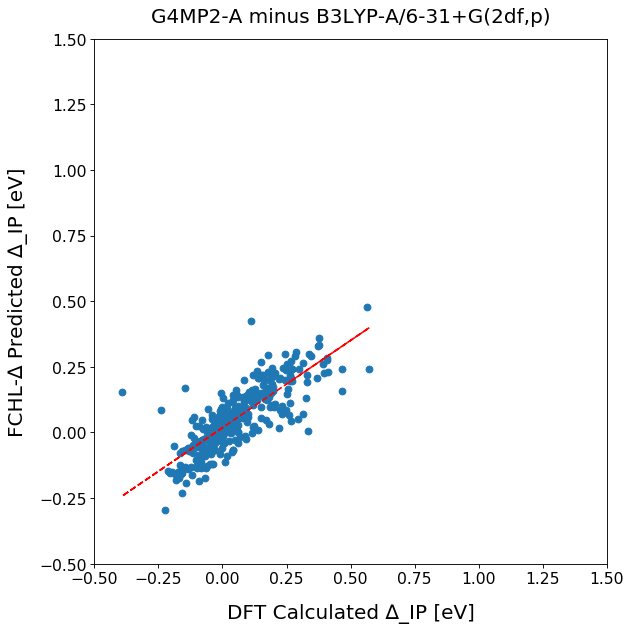

In [3]:
#fig, ax = plt.subplots()

w = 8
h = 8
d = 80
plt.figure(figsize=(w, h), dpi=d)

data = pd.read_csv('deltaIP_g4mp2a_b3lypLa_fchl_predictions.csv')
#figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')

x = data['deltaIP_g4mp2a_b3lypLa']
y = data['pred_deltaIP_g4mp2a_b3lypLa']
z = np.polyfit(x, y, 1)
plt.scatter(x, y)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('G4MP2-A minus B3LYP-A/6-31+G(2df,p)', pad=15, fontsize=18)
plt.xlabel('DFT Calculated ∆_IP [eV]', fontsize=18, labelpad=15)
plt.ylabel('FCHL-∆ Predicted ∆_IP [eV]', labelpad=10, fontsize=18)
plt.tight_layout()
plt.savefig("deltaIP_g4mp2a_b3lypLa.png")
plt.show()


In [49]:
data = pd.read_csv('deltaIP_g4mp2a_b3lypLa_fchl_predictions.csv')

y = data['deltaIP_g4mp2a_b3lypLa']
yhat = data['pred_deltaIP_g4mp2a_b3lypLa']

mae = metrics.mean_absolute_error(y, yhat)
mse = metrics.mean_squared_error(y, yhat)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y,yhat)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)


Results of sklearn.metrics:
MAE: 0.0596318617375774
MSE: 0.007654261675959077
RMSE: 0.08748863741057508
R-Squared: 0.643913131397583


## Load in the Training Data for wB97Xd
Load the training data, complete with the representations

In [50]:
train_data = pd.read_pickle('train_data_deltaIP_g4mp2a_wb97xd.pkl.gz')

In [51]:
test_data = pd.read_pickle('test_data_deltaIP_g4mp2a_wb97xd.pkl.gz')

## Load in the Model
Use the model from the previous calculation

In [52]:
with gzip.open('model_deltaIP_g4mp2a_wb97xd.pkl.gz', 'rb') as fp:
    model = pkl.load(fp)

## Train a Model on cations atomization
Train only using the WB97XD results

In [53]:
results = []
for train_size in tqdm([100, 500, 1000, 1500, 2000, 3000 ]):
    # Get some training data
    train_subset = train_data.sample(train_size)
    
    # Train the model
    train_time = perf_counter()
    model.fit(train_subset['rep'].tolist(), train_subset['deltaIP_g4mp2a_wb97xd'])
    train_time = perf_counter() - train_time

    # Predict the u0 for the test set
    test_time = perf_counter()
    pred_w = model.predict(test_data['rep'].tolist())
    test_time = perf_counter() - test_time
    
    results.append({
        'train_size': train_size,
        'mae': mean_absolute_error(pred_w, test_data['deltaIP_g4mp2a_wb97xd']), 
        'train_time': train_time, 
        'test_time': test_time,
    })

  0%|          | 0/6 [00:00<?, ?it/s]/home/ndandu/.conda/envs/jcesr_ml/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=3.15356e-18): result may not be accurate.
  overwrite_a=True).T
100%|██████████| 6/6 [13:21<00:00, 133.57s/it]


In [54]:
results = pd.DataFrame(results)
results

,mae,test_time,train_size,train_time
0,0.075487,3.447699,100,0.586015
1,0.047971,12.994753,500,8.962676
2,0.037845,25.240400,1000,35.677937
3,0.036305,36.981385,1500,77.068481
4,0.034071,55.586757,2000,155.021099
5,0.032227,74.539798,3000,315.252215


In [55]:
with open('deltaIP_g4mp2a_wb97xd_fchl.json', 'w') as fp:
    json.dump({
        'name': 'FCHL',
        'description': 'Model built using the FCHL representation, as implemented in QML, and KRR',
        'rdox_benchmark': results.to_dict('records')
    }, fp, indent=2)

In [56]:
with gzip.open('deltaIP_g4mp2a_wb97xd_fchl.pkl.gz', 'wb') as fp:
    pkl.dump(model, fp)

In [57]:
data=pd.DataFrame(data={'filename': test_data['filename'], 
                        'n_heavy_atoms': test_data['n_heavy_atoms'], 
                        'n_electrons': test_data['n_electrons'], 
                        'xyz': test_data['xyz'], 
                        'xyz_oxidized': test_data['xyz_oxidized'],
                        'deltaIP_g4mp2a_wb97xd': test_data['deltaIP_g4mp2a_wb97xd'], 
                        'pred_deltaIP_g4mp2a_wb97xd' : pred_w})


In [58]:
data.to_csv('deltaIP_g4mp2a_wb97xd_fchl_predictions.csv', index=False)

In [59]:
data = pd.read_csv('deltaIP_g4mp2a_wb97xd_fchl_predictions.csv')

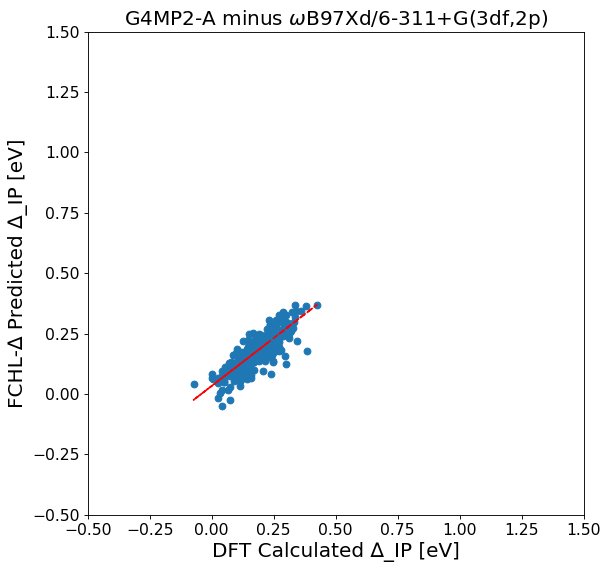

In [60]:
#fig, ax = plt.subplots()

w = 8
h = 8
d = 80
plt.figure(figsize=(w, h), dpi=d)

data = pd.read_csv('deltaIP_g4mp2a_wb97xd_fchl_predictions.csv')
#figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')

x = data['deltaIP_g4mp2a_wb97xd']
y = data['pred_deltaIP_g4mp2a_wb97xd']
z = np.polyfit(x, y, 1)
plt.scatter(x, y)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('G4MP2-A minus $\omega$B97Xd/6-311+G(3df,2p)', fontsize=18)
plt.xlabel('DFT Calculated ∆_IP [eV]', fontsize=18)
plt.ylabel('FCHL-∆ Predicted ∆_IP [eV]', fontsize=18)
#plt.plot(data["G4MP2_IP"], data["pred_y_300-g4mp2"], "o")
plt.savefig("deltaIP_g4mp2a_wb97xd.png")
plt.show()


In [61]:
data = pd.read_csv('deltaIP_g4mp2a_wb97xd_fchl_predictions.csv')

y = data['deltaIP_g4mp2a_wb97xd']
yhat = data['pred_deltaIP_g4mp2a_wb97xd']

mae = metrics.mean_absolute_error(y, yhat)
mse = metrics.mean_squared_error(y, yhat)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y,yhat)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)


Results of sklearn.metrics:
MAE: 0.032227279976591625
MSE: 0.0018980076190040962
RMSE: 0.04356612926350121
R-Squared: 0.6785936450398586


## Load in the Training Data for wB97Xda
Load the training data, complete with the representations

In [62]:
train_data = pd.read_pickle('train_data_deltaIP_g4mp2a_wb97xda.pkl.gz')

In [63]:
test_data = pd.read_pickle('test_data_deltaIP_g4mp2a_wb97xda.pkl.gz')

## Load in the Model
Use the model from the previous calculation

In [64]:
with gzip.open('model_deltaIP_g4mp2a_wb97xda.pkl.gz', 'rb') as fp:
    model = pkl.load(fp)

## Train a Model on cations atomization
Train only using the WB97XD results

In [65]:
results = []
for train_size in tqdm([100, 500, 1000, 1500, 2000, 3000 ]):
    # Get some training data
    train_subset = train_data.sample(train_size)
    
    # Train the model
    train_time = perf_counter()
    model.fit(train_subset['rep'].tolist(), train_subset['deltaIP_g4mp2a_wb97xda'])
    train_time = perf_counter() - train_time

    # Predict the u0 for the test set
    test_time = perf_counter()
    pred_wa = model.predict(test_data['rep'].tolist())
    test_time = perf_counter() - test_time
    
    results.append({
        'train_size': train_size,
        'mae': mean_absolute_error(pred_wa, test_data['deltaIP_g4mp2a_wb97xda']), 
        'train_time': train_time, 
        'test_time': test_time,
    })

  0%|          | 0/6 [00:00<?, ?it/s]/home/ndandu/.conda/envs/jcesr_ml/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=5.1211e-18): result may not be accurate.
  overwrite_a=True).T
100%|██████████| 6/6 [13:17<00:00, 132.85s/it]


In [66]:
results = pd.DataFrame(results)
results

,mae,test_time,train_size,train_time
0,0.100486,3.125600,100,0.482538
1,0.042476,13.131606,500,9.231921
2,0.037908,24.873641,1000,34.728652
3,0.038154,37.054301,1500,76.645188
4,0.032965,55.281649,2000,153.565798
5,0.031835,74.473308,3000,314.472707


In [67]:
with open('deltaIP_g4mp2a_wb97xda_fchl.json', 'w') as fp:
    json.dump({
        'name': 'FCHL',
        'description': 'Model built using the FCHL representation, as implemented in QML, and KRR',
        'rdox_benchmark': results.to_dict('records')
    }, fp, indent=2)

In [68]:
with gzip.open('deltaIP_g4mp2a_wb97xda_fchl.pkl.gz', 'wb') as fp:
    pkl.dump(model, fp)

In [69]:
data=pd.DataFrame(data={'filename': test_data['filename'], 
                        'n_heavy_atoms': test_data['n_heavy_atoms'], 
                        'n_electrons': test_data['n_electrons'], 
                        'n_atoms': test_data['n_atoms'], 
                        'xyz': test_data['xyz'], 
                        'xyz_oxidized': test_data['xyz_oxidized'],
                        'G4MP2_IP': test_data['G4MP2_IP'], 
                        'G4MP2_IP_ASC': test_data['G4MP2_IP_ASC'], 
                        'B3LYP_IP': test_data['B3LYP_IP'], 
                        'B3LYP_IP_ASC': test_data['B3LYP_IP_ASC'], 
                        'B3LYP_large_IP': test_data['B3LYP_large_IP'], 
                        'B3LYP_large_IP_ASC': test_data['B3LYP_large_IP_ASC'], 
                        'wB97Xd_IP': test_data['wB97Xd_IP'], 
                        'wB97Xd_IP_ASC': test_data['wB97Xd_IP_ASC'], 
                        
                        'deltaIP_g4mp2a_b3lyp': test_data['deltaIP_g4mp2a_b3lyp'], 
                        'pred_deltaIP_g4mp2a_b3lyp' : pred_b,

                        'deltaIP_g4mp2a_b3lypa': test_data['deltaIP_g4mp2a_b3lypa'], 
                        'pred_deltaIP_g4mp2a_b3lypa' : pred_ba,

                        'deltaIP_g4mp2a_b3lypL': test_data['deltaIP_g4mp2a_b3lypL'], 
                        'pred_deltaIP_g4mp2a_b3lypL' : pred_bL,
                        
                        'deltaIP_g4mp2a_b3lypLa': test_data['deltaIP_g4mp2a_b3lypLa'], 
                        'pred_deltaIP_g4mp2a_b3lypLa' : pred_bLa,
                        
                        'deltaIP_g4mp2a_wb97xd': test_data['deltaIP_g4mp2a_wb97xd'], 
                        'pred_deltaIP_g4mp2a_wb97xd' : pred_w,
                        
                        'deltaIP_g4mp2a_wb97xda': test_data['deltaIP_g4mp2a_wb97xda'], 
                        'pred_deltaIP_g4mp2a_wb97xda' : pred_wa})


In [70]:
data.to_csv('deltaIP_g4mp2a_wb97xda_fchl_predictions.csv', index=False)

In [71]:
data = pd.read_csv('deltaIP_g4mp2a_wb97xda_fchl_predictions.csv')

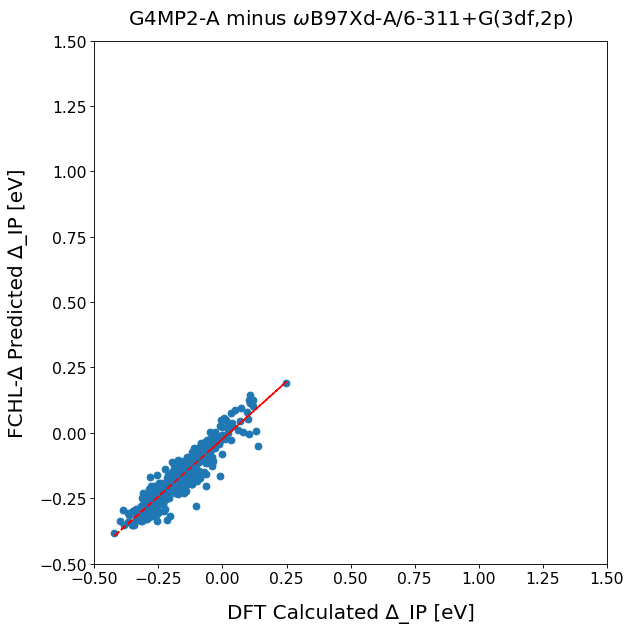

In [72]:
#fig, ax = plt.subplots()

w = 8
h = 8
#d = 80
plt.figure(figsize=(w, h), dpi=d)

data = pd.read_csv('deltaIP_g4mp2a_wb97xda_fchl_predictions.csv')
#figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')

x = data['deltaIP_g4mp2a_wb97xda']
y = data['pred_deltaIP_g4mp2a_wb97xda']
z = np.polyfit(x, y, 1)
plt.scatter(x, y)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('G4MP2-A minus $\omega$B97Xd-A/6-311+G(3df,2p)', pad=15, fontsize=18)
plt.xlabel('DFT Calculated ∆_IP [eV]', labelpad=15, fontsize=18)
plt.ylabel('FCHL-∆ Predicted ∆_IP [eV]', labelpad=10, fontsize=18)
#plt.plot(data["G4MP2_IP"], data["pred_y_300-g4mp2"], "o")
plt.tight_layout()
plt.savefig("deltaIP_g4mp2a_wb97xda.png")
plt.show()


In [73]:
data = pd.read_csv('deltaIP_g4mp2a_wb97xda_fchl_predictions.csv')

y = data['deltaIP_g4mp2a_wb97xda']
yhat = data['pred_deltaIP_g4mp2a_wb97xda']

mae = metrics.mean_absolute_error(y, yhat)
mse = metrics.mean_squared_error(y, yhat)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y,yhat)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)


Results of sklearn.metrics:
MAE: 0.03183490070216142
MSE: 0.0018339409452433476
RMSE: 0.042824536719541374
R-Squared: 0.8625417432668964
